In [9]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import h5py
import tensorflow as tf

In [10]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
keras.backend.image_data_format()

'channels_first'

In [12]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
x_train = x_train / 255.
x_test = x_test / 255.

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_test = x_test.reshape(-1, 1, 28, 28)

In [16]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential

In [17]:
import keras.backend.tensorflow_backend as tfback

In [18]:
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [19]:
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=3, strides=1, padding='same', input_shape=(1, 28, 28), activation="relu", \
                name='conv1', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool1', data_format='channels_first'))

lenet.add(Conv2D(16, kernel_size=5, strides=1, padding='valid', activation="relu", \
                 name='conv2', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool2', data_format="channels_first"))
lenet.add(Flatten(name='flatten', data_format="channels_last"))
lenet.add(Dense(120, activation="relu", name='fc1'))
lenet.add(Dense(84, activation="relu", name='fc2'))
lenet.add(Dense(10, activation='softmax', name='softmax'))

In [20]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 6, 28, 28)         60        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 6, 14, 14)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 10, 10)        2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)               

In [21]:
lenet.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# lenet.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=[x_test, y_test])

In [23]:
# lenet.save('LeNet_NCHW2.h5')

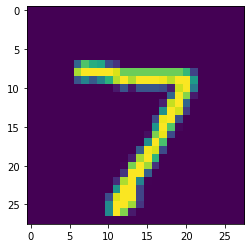

In [24]:
plt.imshow(x_test[0][0])

In [44]:
lenet.load_weights('LeNet_NCHW2.h5')

In [45]:
print("[INFO] evaluating...")
(loss, accuracy) = lenet.evaluate(x_test, y_test, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
10000/10000 [==============================] - 1s 107us/step
[INFO] accuracy: 98.57%


In [36]:
image_7 = np.expand_dims(x_test[0], axis=0)
pred = lenet.predict(image_7)
pred

array([[4.1750793e-13, 1.0217871e-07, 4.7025295e-09, 7.9027460e-09,
        4.6409793e-11, 4.0204432e-14, 3.6066829e-20, 9.9999988e-01,
        5.8345616e-12, 4.1460571e-10]], dtype=float32)

In [37]:
result = np.where(pred == np.amax(pred))[1][0]
result

7

array([[1.01060216e-10, 5.65499558e-09, 1.00000000e+00, 1.62218156e-12,
        2.87767718e-16, 1.21381682e-18, 1.05326636e-13, 5.10231769e-17,
        1.17036866e-10, 7.55894980e-14]], dtype=float32)

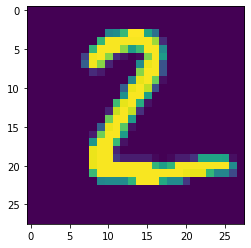

In [39]:
plt.imshow(x_test[1][0])
image_2 = np.expand_dims(x_test[1], axis=0)
pred = lenet.predict(image_2)
pred

In [33]:
result = np.where(pred == np.amax(pred))[1][0]
result

2

In [42]:
with open("image_2_in.dat","w") as f:
    for i in image_2[0]:
        for j in i:
            for k in j:
                f.write(str(k)+"\n")

In [43]:
with open("image_2_out.dat","w") as f:
    for p in pred[0]:
        f.write(str(p)+"\n")

array([[9.9998307e-01, 4.7067927e-13, 1.0644889e-07, 5.1468343e-12,
        3.5476391e-13, 1.5801970e-09, 1.5357744e-05, 2.4492919e-13,
        4.6189570e-11, 1.4397186e-06]], dtype=float32)

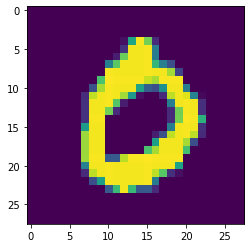

In [48]:
plt.imshow(x_test[3][0])
image_0 = np.expand_dims(x_test[3], axis=0)
pred = lenet.predict(image_0)
pred

In [50]:
result = np.where(pred == np.amax(pred))[1][0]
result

0

In [51]:
with open("image_0_in.dat","w") as f:
    for i in image_0[0]:
        for j in i:
            for k in j:
                f.write(str(k)+"\n")

In [52]:
with open("image_0_out.dat","w") as f:
    for p in pred[0]:
        f.write(str(p)+"\n")